In [1]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets --quiet

In [2]:
from numpy.fft import rfft, rfftfreq
from sklearn import preprocessing
import os
import pandas as pd
import numpy as np
import glob
import timeit
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Electric Data.csv',header=None)
df.drop(df.columns[7:], axis=1, inplace=True)

In [4]:
df.iloc[:, 0] -= 1
df.head()

,0,1,2,3,4,5,6
0,0,2.661025,2.624276,2.701274,0.490768,0.478549,0.493368
1,0,2.660319,2.624661,2.700700,0.491114,0.478722,0.492584
2,0,2.658824,2.623414,2.699373,0.490782,0.478066,0.492499
3,0,2.659359,2.623496,2.700214,0.490901,0.477804,0.492882
4,0,2.659918,2.624527,2.701876,0.491155,0.478174,0.492339


In [5]:
df_0 = df[df.iloc[:, 0] == 0]
df_1 = df[df.iloc[:, 0] == 1]
df_2 = df[df.iloc[:, 0] == 2]
df_3 = df[df.iloc[:, 0] == 3]
df_4 = df[df.iloc[:, 0] == 4]
df_5 = df[df.iloc[:, 0] == 5]
df_6 = df[df.iloc[:, 0] == 6]
df_0.drop(df_0.columns[0:1], axis=1, inplace=True)
df_1.drop(df_1.columns[0:1], axis=1, inplace=True)

df_2.drop(df_2.columns[0:1], axis=1, inplace=True)

df_3.drop(df_3.columns[0:1], axis=1, inplace=True)
df_4.drop(df_4.columns[0:1], axis=1, inplace=True)
df_5.drop(df_5.columns[0:1], axis=1, inplace=True)
df_6.drop(df_6.columns[0:1], axis=1, inplace=True)



C:\Users\mehul\AppData\Local\Temp\ipykernel_16040\828725169.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0.drop(df_0.columns[0:1], axis=1, inplace=True)
C:\Users\mehul\AppData\Local\Temp\ipykernel_16040\828725169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(df_1.columns[0:1], axis=1, inplace=True)
C:\Users\mehul\AppData\Local\Temp\ipykernel_16040\828725169.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [6]:
print(df_6)

            1         2         3         4         5         6
758  2.638303  2.602147  2.674996  0.807445  0.787841  0.799688
759  2.639261  2.601776  2.674889  0.805906  0.786128  0.798595
760  2.637713  2.600656  2.673487  0.804641  0.784271  0.798060
761  2.637658  2.600486  2.673771  0.803147  0.782514  0.797477
762  2.638693  2.600891  2.673654  0.802208  0.781319  0.795606
763  2.638221  2.600729  2.674951  0.800188  0.779803  0.795084
764  2.638303  2.602147  2.674996  0.807445  0.787841  0.799688
765  2.639261  2.601776  2.674889  0.805906  0.786128  0.798595
766  2.637713  2.600656  2.673487  0.804641  0.784271  0.798060
767  2.637658  2.600486  2.673771  0.803147  0.782514  0.797477
768  2.650827  2.608411  2.682292  0.856256  0.836880  0.847013
769  2.652089  2.609181  2.682892  0.857280  0.837079  0.846980
770  2.650468  2.608143  2.682578  0.857336  0.837601  0.847664
771  2.647940  2.606494  2.680609  0.857952  0.838779  0.848282
772  2.648501  2.606822  2.681451  0.858

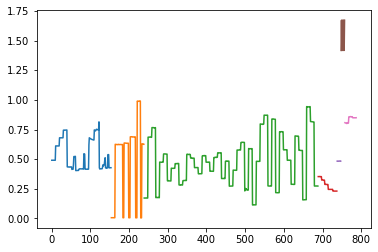

In [7]:
plt.plot(df_0[4])
plt.plot(df_1[4])
plt.plot(df_2[4])
plt.plot(df_3[4])
plt.plot(df_4[4])
plt.plot(df_5[4])
plt.plot(df_6[4])
plt.show()

In [8]:
X=df[df.columns[1:]]
Y=df[df.columns[0:1]]
Y=y =np.array( pd.Series.ravel(Y))

In [9]:
X.head()

,1,2,3,4,5,6
0,2.661025,2.624276,2.701274,0.490768,0.478549,0.493368
1,2.660319,2.624661,2.700700,0.491114,0.478722,0.492584
2,2.658824,2.623414,2.699373,0.490782,0.478066,0.492499
3,2.659359,2.623496,2.700214,0.490901,0.477804,0.492882
4,2.659918,2.624527,2.701876,0.491155,0.478174,0.492339


In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
scaled_X.head()

,1,2,3,4,5,6
0,0.878327,0.849753,0.854832,0.291733,0.287887,0.292059
1,0.877974,0.849965,0.854529,0.291941,0.287992,0.291587
2,0.877226,0.849276,0.853828,0.291742,0.287594,0.291536
3,0.877494,0.849322,0.854272,0.291813,0.287435,0.291766
4,0.877773,0.849891,0.855150,0.291966,0.287659,0.291439


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5 , random_state=40, shuffle=True)

In [12]:
y_train.shape


(394,)

In [18]:
svm_classifier_poly = SVC(kernel='poly', degree=4)

# Train the classifier on the training data
svm_classifier_poly.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier_poly.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy: ",accuracy_score(svm_classifier_poly.predict(X_train),y_train))

Test Accuracy: 0.8705583756345178
Train Accuracy:  0.8908629441624365


In [19]:
svm_classifier_lin = SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier_lin.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier_lin.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy: ",accuracy_score(svm_classifier_lin.predict(X_train),y_train))

Test Accuracy: 0.682741116751269
Train Accuracy:  0.7030456852791879


In [20]:
svm_classifier_rbf = SVC(kernel='rbf')

# Train the classifier on the training data
svm_classifier_rbf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier_rbf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy: ",accuracy_score(svm_classifier_rbf.predict(X_train),y_train))

Test Accuracy: 0.6852791878172588
Train Accuracy:  0.7081218274111675


In [21]:
svm_classifier_sig = SVC(kernel='sigmoid')

# Train the classifier on the training data
svm_classifier_sig.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier_sig.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy: ",accuracy_score(svm_classifier_sig.predict(X_train),y_train))

Test Accuracy: 0.5710659898477157
Train Accuracy:  0.5710659898477157
